In [83]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [84]:
df = pd.read_csv("E:/Learning/Krish/Sections/Unsupervised/Kmeans/income.csv")

In [85]:
df.head()


,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


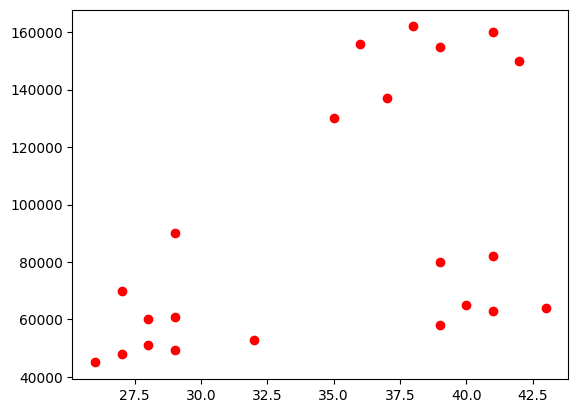

In [86]:
plt.scatter(df['Age'],df['Income($)'],color='red')

In [87]:
km= KMeans(n_clusters=3)


In [88]:
km.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [89]:
y_predicted = km.fit_predict(df[["Age","Income($)"]])

y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [90]:
df['cluster']=y_predicted
df

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


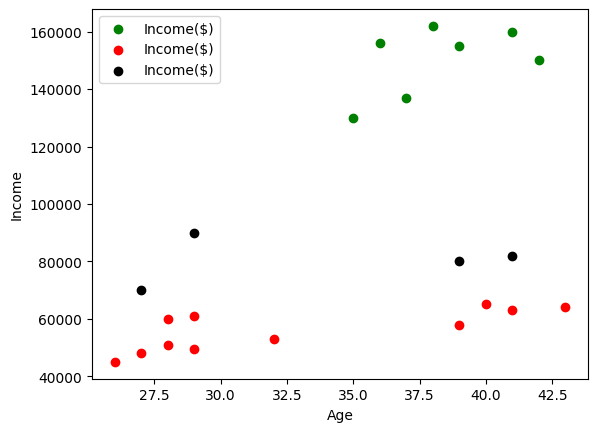

In [91]:
df1 = df[df.cluster==0]
df2 = df[df.cluster ==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color ="red")
plt.scatter(df3.Age,df3['Income($)'],color='black')
#question why AGE is accesing dataframe through . operation and why incom is in bracket?
#ans: Because Age is simple without any speaces or special noteation on the other hand the income has the special notation
#$ sign because of that it is used like that 

plt.xlabel("Age")
plt.ylabel('Income')
plt.legend(['Income($)','Income($)','Income($)'])
plt.show()

In [92]:
#we need to do some preprocessing using mean max scaler to scale the feature

from sklearn.preprocessing import MinMaxScaler

In [93]:
scaler = MinMaxScaler()

In [94]:
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df

scaler.fit(df[["Age"]])
df.Age = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [95]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[["Age",'Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [96]:
df['Cluster'] = y_predicted

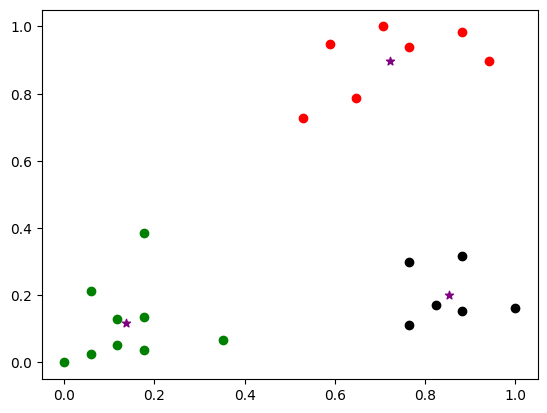

In [ ]:
df1 = df[df.Cluster ==0]
df2 = df[df.Cluster ==1]
df3 = df[df.Cluster ==2]

plt.scatter(df1.Age,df1["Income($)"],color = 'green')
plt.scatter(df2.Age,df2["Income($)"],color ="red")
plt.scatter(df3.Age,df3['Income($)'],color ='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color= 'purple',marker='*') #to check where the centroids are 



In [99]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

#now using elbow plot method
#accoring to theory we intitate different k value and find SSE(Sum of square) based on that we find the elblow where it shows now many k should be taken 

In [106]:
k_range = range(1,10)

sse =[]

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_) 



In [107]:
sse

[5.434011511988179,
 2.3456144914725936,
 0.4750783498553096,
 0.44721771734853516,
 0.3395668102388398,
 0.22508595962223274,
 0.17462386586687895,
 0.15390969462258616,
 0.11314812855825189]

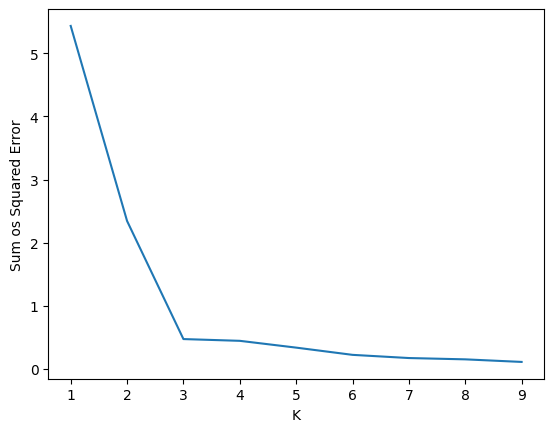

In [108]:
plt.xlabel('K')
plt.ylabel('Sum os Squared Error')
plt.plot(k_range,sse)

In [ ]:
#So as it is seen the elbow is at value 3 so that is the best k value that we can use